<a href="https://colab.research.google.com/github/NancyBudgujjar/Liver-Disease-Prediction/blob/main/Final_GEC_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/uciml/indian-liver-patient-records

Prediction of Liver Disease using Random Forest classifierand balancing imbalanced data.
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. 
The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). 
This data set contains 441 male patient records and 142 female patient records.Any patient whose age exceeded 89 is listed as being of age "90".





In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/indian_liver_patient.csv')
df.shape

(583, 11)

In [4]:
df['Dataset'].value_counts()  # 1 = Liver disease and 2 is no disease

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
categories = {1: 1, 2: 0}   #Now we map 1 = 1(Liver disease), 2 = 0(no disease)
df['Dataset'] = df['Dataset'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.describe().T  #Values need to be normalized before fitting. 

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,0.713551,0.452490,0.0,0.0,1.00,1.0,1.0


In [8]:
print(df.isnull().sum())
#df = df.dropna()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [9]:
print(df['Albumin_and_Globulin_Ratio'].mean())

0.9470639032815197


In [10]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [11]:
df.duplicated().sum()

13

In [12]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'Dataset':'Label'})
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

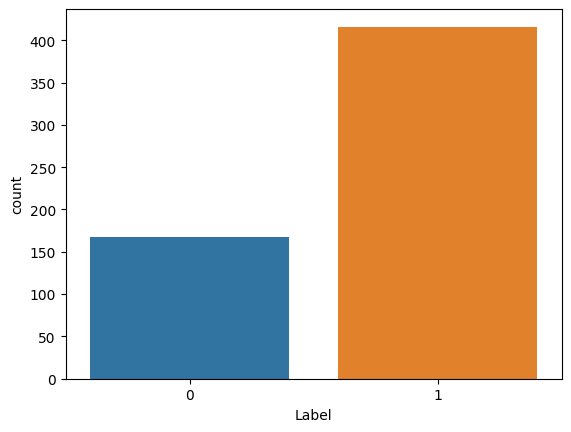

In [13]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

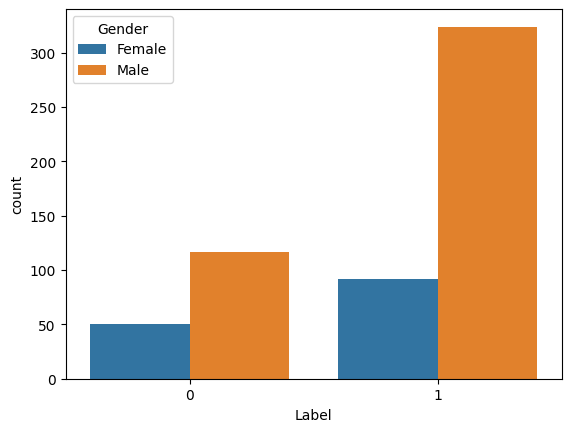

In [14]:
sns.countplot(x="Label", hue="Gender", data=df)

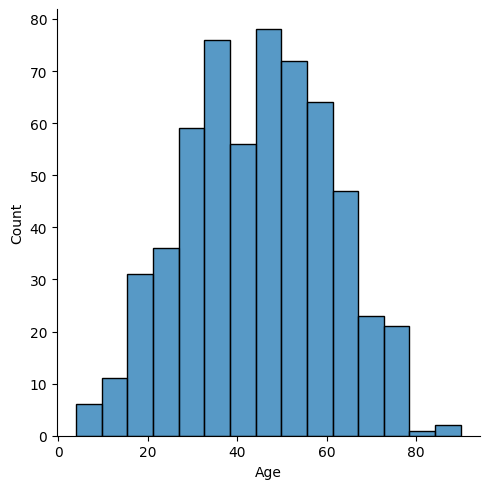

In [15]:
sns.displot(df['Age'], kde=False)

<Axes: xlabel='Age', ylabel='count'>

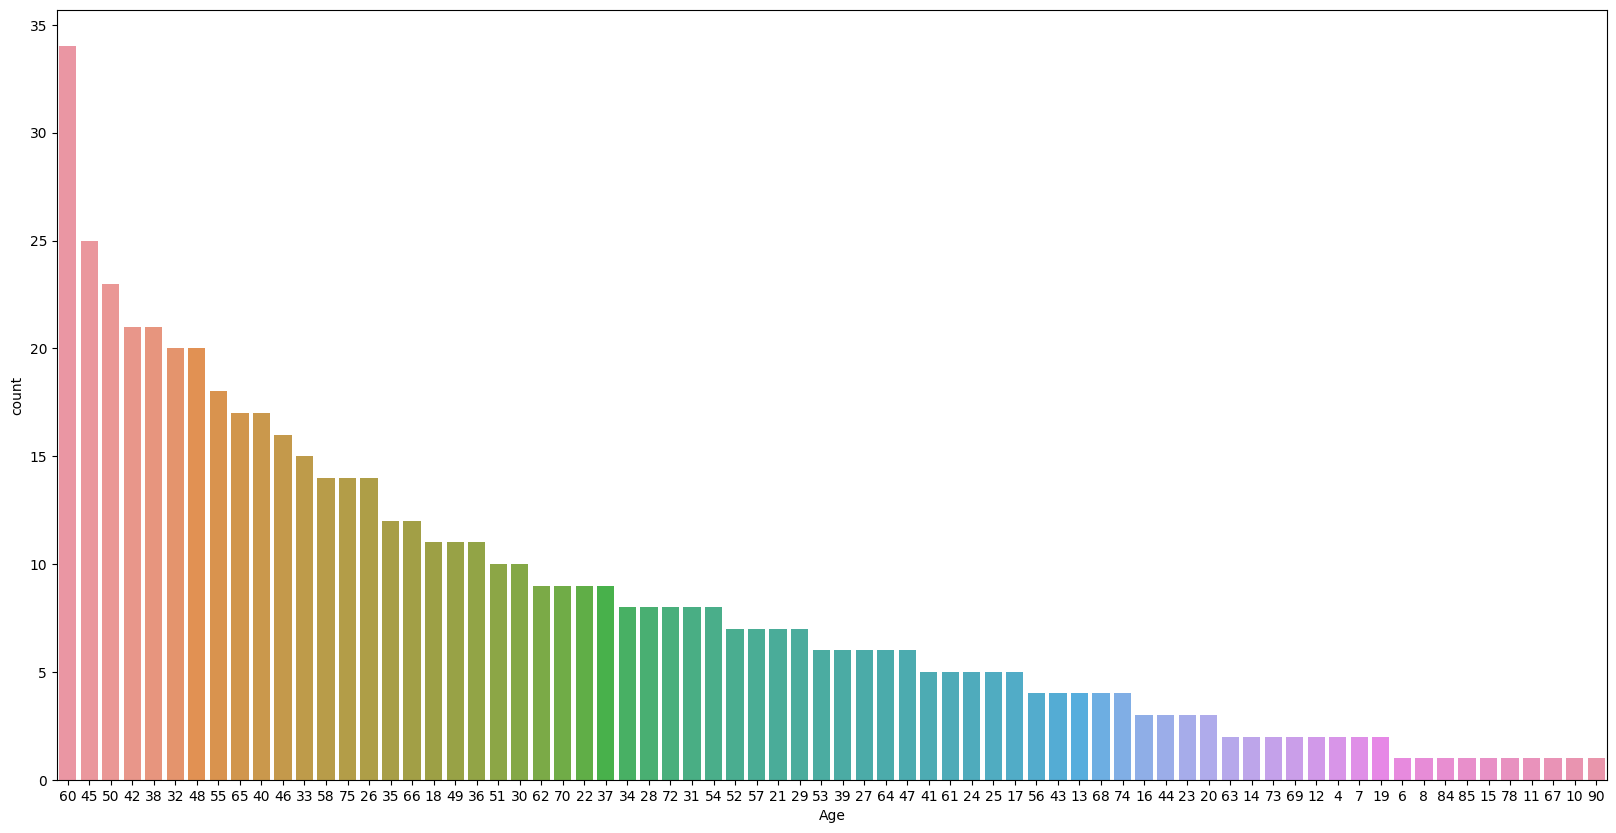

In [16]:
plt.figure(figsize=(20,10)) 
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='Albumin'>

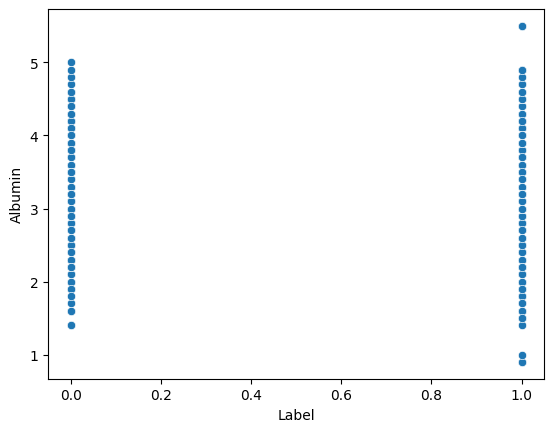

In [17]:
sns.scatterplot(x="Label", y="Albumin", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Label', ylabel='Albumin_and_Globulin_Ratio'>

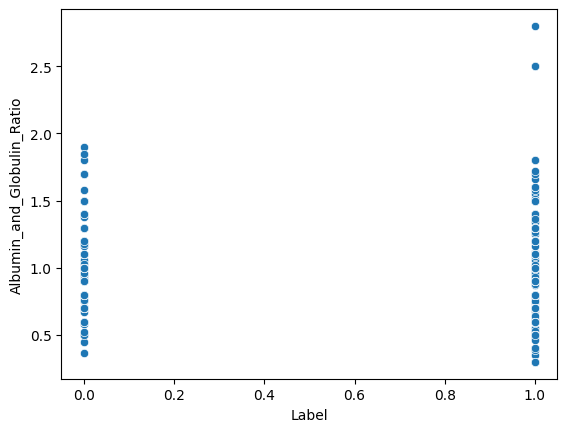

In [18]:
sns.scatterplot(x="Label", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

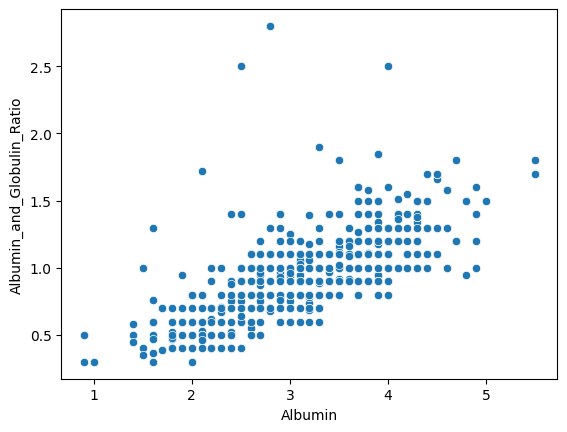

In [19]:
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

In [20]:
#sns.pairplot(df, hue='Gender')

<ipython-input-21-5d808ea4b7c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

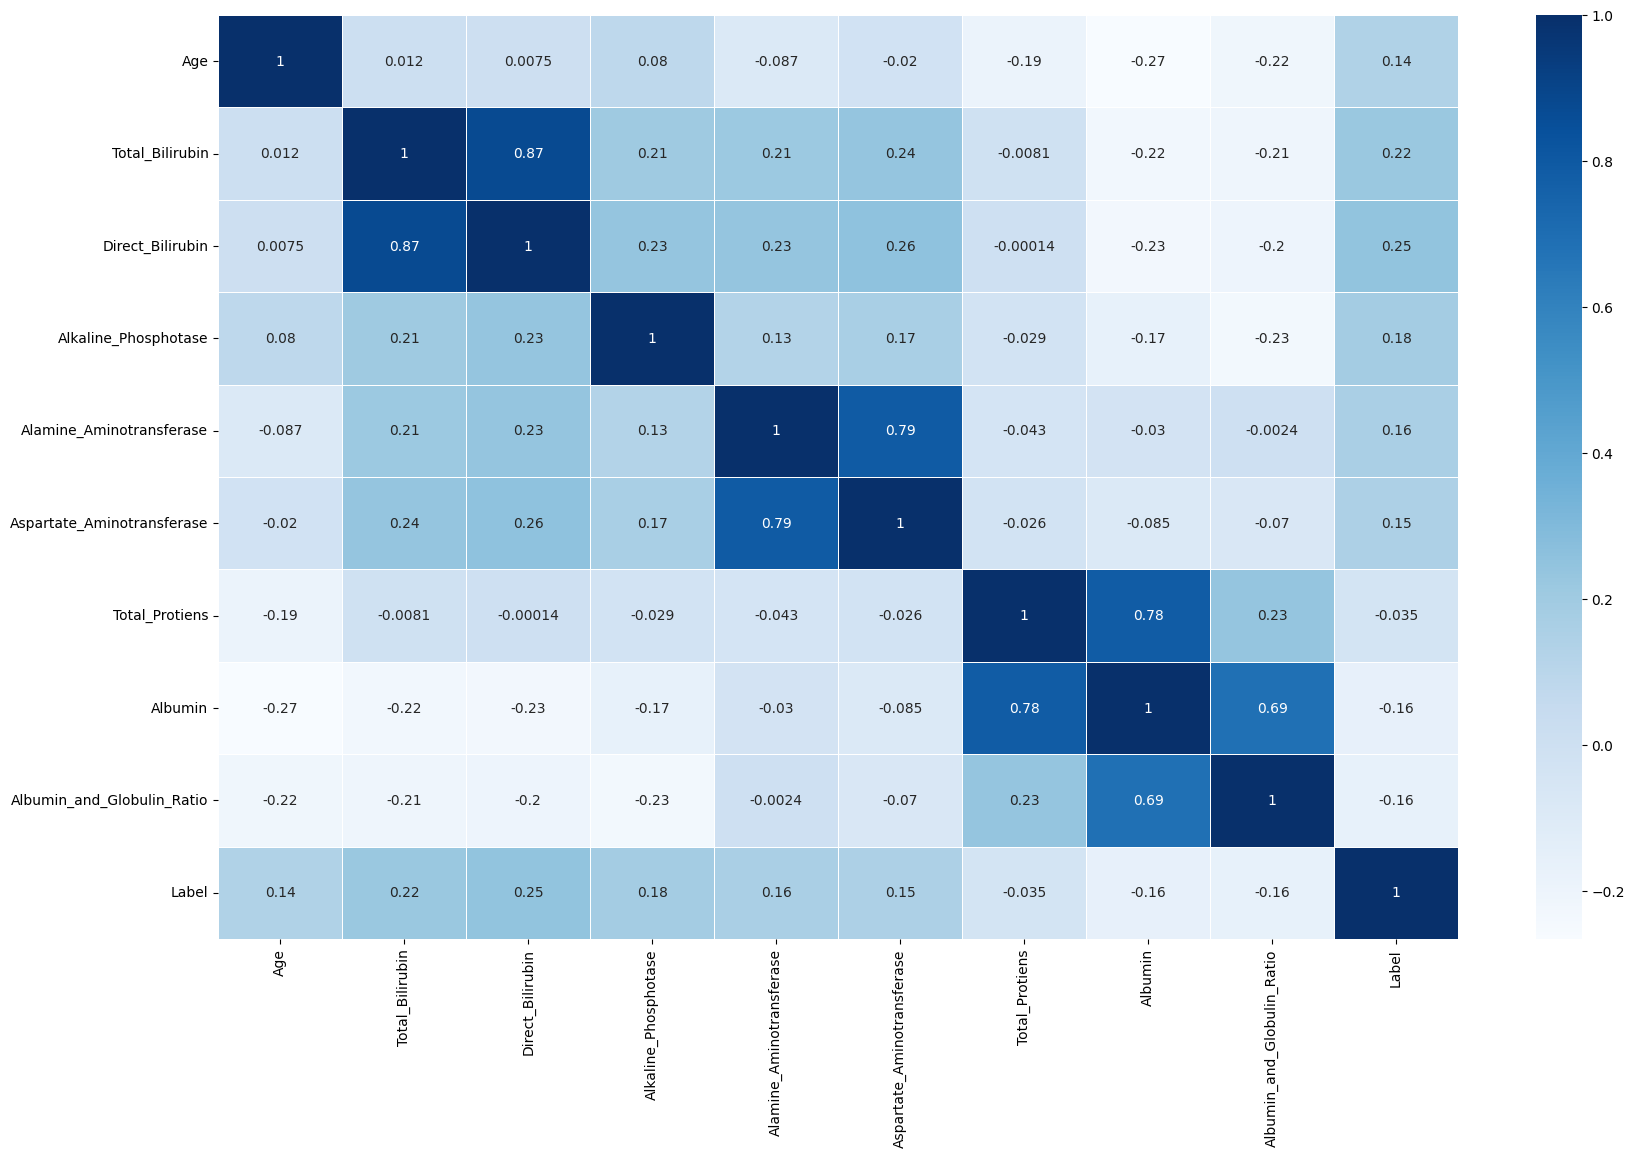

In [21]:
corr=df.corr()
plt.figure(figsize=(20,12)) 
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True)
#May be Gender and total protien not big factors influencing the label

In [22]:
df['Gender'].value_counts()  

Male      441
Female    142
Name: Gender, dtype: int64

In [26]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Gender'] = df['Gender'].replace(categories)

Y = df["Label"].values 
X = df.drop(labels = ["Label", "Gender"], axis=1) 

In [27]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)

(524, 9)
(524,)


In [28]:
from keras.utils import normalize
X = normalize(X, axis=1)

# Technique 1: Appropriate Model Selection
Logistic regression :- Can be very slow. 

SVM :- can also be extremely slow. 

Random Forest :- ideal for imbalanced datasets. 

#Logestic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=900)

logreg.fit(X_train, y_train) # fit the model on the training data

y_pred = logreg.predict(X_test) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test, y_pred) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7796610169491526


#Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train) # Train the SVM model on the training data
y_pred = svm_model.predict(X_test) # Make predictions on the test data

accuracy = metrics.accuracy_score(y_test, y_pred) # Calculate the accuracy of the SVM model
print("Accuracy:", accuracy)

Accuracy: 0.7627118644067796


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

models= [('Logistic Regression', LogisticRegression()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('RandomForestClassifier',RandomForestClassifier()),
         ('AdaBoostClassifier',AdaBoostClassifier()),
         ('XGBClassifier',XGBClassifier()),
         ('KNeighborsClassifier',KNeighborsClassifier()),
         ('GaussianNB',GaussianNB ())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                ModelName  Train_Acc  Test_Acc
0     Logistic Regression   0.717557  0.779661
1           Decision Tree   1.000000  0.559322
2  RandomForestClassifier   1.000000  0.796610
3      AdaBoostClassifier   0.814885  0.779661
4           XGBClassifier   1.000000  0.796610
5    KNeighborsClassifier   0.776718  0.745763
6              GaussianNB   0.549618  0.559322


#Random Forest

In [33]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Alkaline_Phosphotase          0.163651
Alamine_Aminotransferase      0.132463
Age                           0.123253
Direct_Bilirubin              0.115115
Aspartate_Aminotransferase    0.114566
Total_Bilirubin               0.094254
Albumin                       0.088632
Albumin_and_Globulin_Ratio    0.084436
Total_Protiens                0.083630
dtype: float64


In [34]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data. 

print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test_RF))

METRICS FOR IMBALANCED DATA: 
Accuracy =  0.8305084745762712


In [35]:
(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print(unique, counts)

[0 1] [12 47]


In [36]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print(cm)

[[ 8  6]
 [ 4 41]]


means 10/22 labled are correctly as 0 and 12/22 are mislablled as 1, i.e., 12 are healthy patients but still labelled as 1.

73 our of 92 are correctly labled and 19 are mislablled. 

In [37]:
#Print individual accuracy values for each class, based on the confusion matrix
print("With NO Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("With Lung disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With NO Lung disease =  0.6666666666666666
With Lung disease =  0.8723404255319149


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [38]:
from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

print("ROC_AUC score for imbalanced data is:")
print(roc_auc_score(y_test, prediction_test_RF))

ROC_AUC score for imbalanced data is:
0.7412698412698412


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


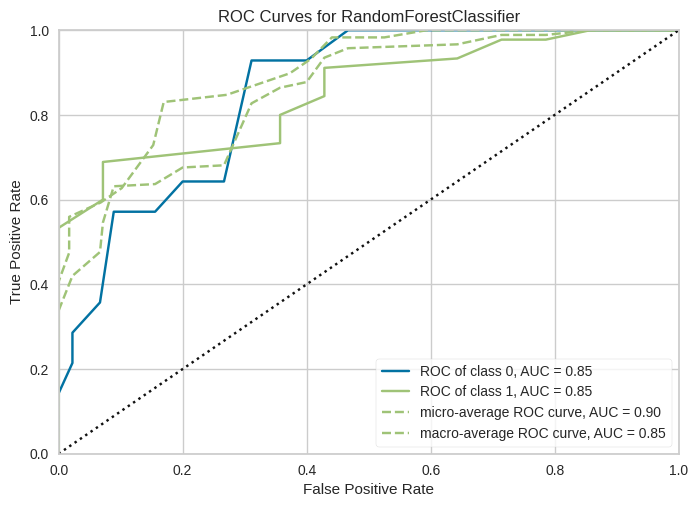

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

# Technique 6: Generate synthetic data (SMOTE and ADASYN)
SMOTE: Synthetic Minority Oversampling Technique

ADASYN: Adaptive Synthetic

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

pip install imblearn

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [83]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y) 
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1] [167 416]
After SMOTE:  [0 1] [416 416]


#Logestic Regression

In [84]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote) # fit the model on the training data
LR_prediction_smote = model_LR.predict(X_test_smote) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6347305389221557


In [85]:
print(roc_auc_score(y_test_smote, LR_prediction_smote))

0.6290579710144926


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


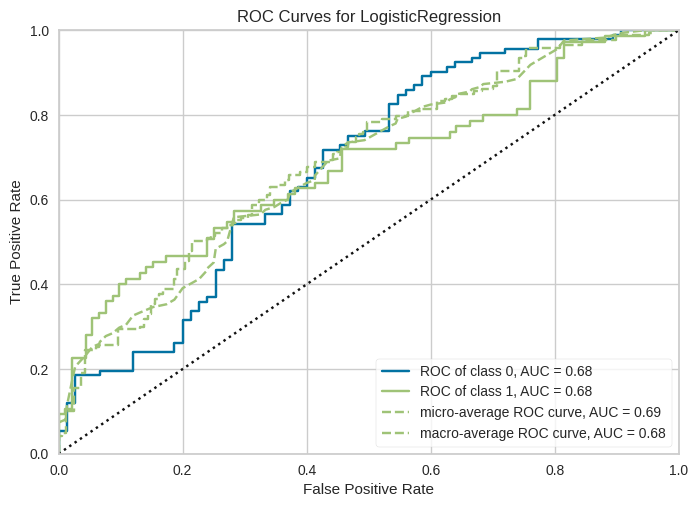

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [86]:
roc_auc=ROCAUC(model_LR)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#SVM

In [87]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_smote, y_train_smote) 
SVM_prediction_smote = model_SVM.predict(X_test_smote) 

accuracy = metrics.accuracy_score(y_test_smote, SVM_prediction_smote) # Calculate the accuracy of the SVM model after SMOTE
print("Accuracy:", accuracy)

Accuracy: 0.6646706586826348


In [88]:
print(roc_auc_score(y_test_smote, SVM_prediction_smote))

0.6352898550724638


#Random Forest

In [89]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

prediction_test_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, prediction_test_smote))

Accuracy =  0.8023952095808383


In [90]:
print(roc_auc_score(y_test_smote, prediction_test_smote))

0.7923188405797101


In [91]:
#Confusion Matrix
(unique, counts) = np.unique(prediction_test_smote, return_counts=True)
print(unique, counts)

cm = confusion_matrix(y_test_smote, prediction_test_smote)
print(cm)

[0 1] [105  62]
[[82 10]
 [23 52]]


In [92]:
print("With NO Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("With Lung disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With NO Lung disease =  0.780952380952381
With Lung disease =  0.8387096774193549


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


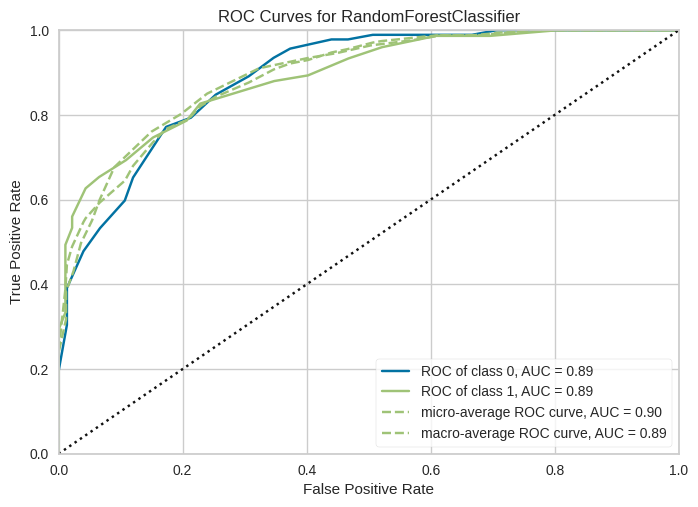

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [93]:
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#ADASYN

In [94]:
from imblearn.over_sampling import ADASYN

X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, Y_adasyn, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

Original data:  [0 1] [167 416]
After ADASYN:  [0 1] [388 416]


Linear Regression

In [95]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_adasyn, y_train_adasyn) # fit the model on the training data
LR_prediction_adasyn = model_LR.predict(X_test_adasyn) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test_adasyn, LR_prediction_adasyn) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6086956521739131


SVM

In [96]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_adasyn, y_train_adasyn) 
SVM_prediction_adasyn = model_SVM.predict(X_test_adasyn) 

accuracy = metrics.accuracy_score(y_test_adasyn, SVM_prediction_adasyn) # Calculate the accuracy of the SVM model after SMOTE
print("Accuracy:", accuracy)

Accuracy: 0.6024844720496895


Random Forest

In [97]:
model_adasyn = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_adasyn.fit(X_train_adasyn, y_train_adasyn)

prediction_test_adasyn = model_adasyn.predict(X_test_adasyn)
print ("Accuracy = ", metrics.accuracy_score(y_test_adasyn, prediction_test_adasyn))

Accuracy =  0.7577639751552795


In [98]:
#Confusion Matrix
(unique, counts) = np.unique(prediction_test_adasyn, return_counts=True)
print(unique, counts)

cm = confusion_matrix(y_test_adasyn, prediction_test_adasyn)
print(cm)

[0 1] [88 73]
[[64 15]
 [24 58]]


In [99]:
print("With NO Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("With Lung disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With NO Lung disease =  0.7272727272727273
With Lung disease =  0.7945205479452054


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


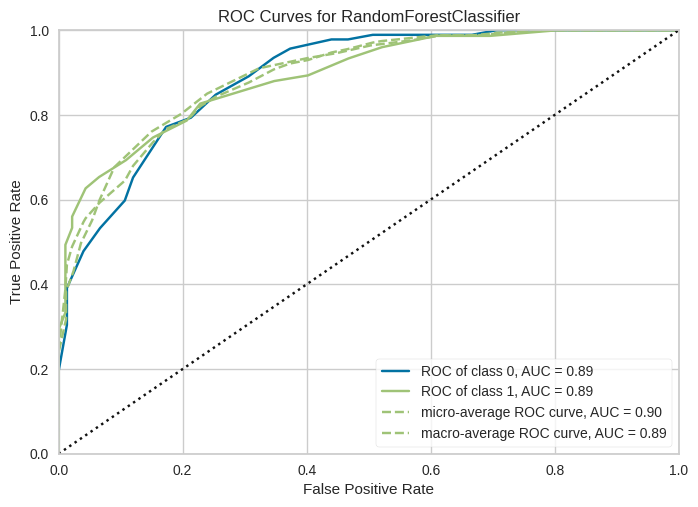

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [100]:
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

# Handling Imbalanced data
 Technique 2 Up-sample minority class

In [101]:
from sklearn.utils import resample
print(df['Label'].value_counts())

1    416
0    167
Name: Label, dtype: int64


In [102]:
df_majority = df[df['Label'] == 1]  #Separate majority and minority classes
df_minority = df[df['Label'] == 0]

In [103]:
# Upsample minority class and other classes separately
# If not, random samples from combined classes will be duplicated and we run into same issue as before, undersampled remians undersampled.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match average class
                                 random_state=42) # reproducible results

In [104]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # Combine majority class with upsampled minority class
print(df_upsampled['Label'].value_counts())

1    416
0    416
Name: Label, dtype: int64


In [105]:
Y_upsampled = df_upsampled["Label"].values

X_upsampled = df_upsampled.drop(labels = ["Label", "Gender"], axis=1) 
X_upsampled = normalize(X_upsampled, axis=1)

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

#Train again with new upsamples data

RANDOM FOREST

In [106]:
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
prediction_test_RF_upsampled = model_RF_upsampled.predict(X_test_upsampled)

print("METRICS FOR BALANCED DATA USING UPSAMPLING : ")
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, prediction_test_RF_upsampled))

METRICS FOR BALANCED DATA USING UPSAMPLING : 
Accuracy =  0.8622754491017964


In [107]:
(unique, counts) = np.unique(prediction_test_RF_upsampled, return_counts=True)
print(unique, counts)

[0 1] [88 79]


In [108]:
cm_upsampled = confusion_matrix(y_test_upsampled, prediction_test_RF_upsampled)
print(cm_upsampled)

[[71  6]
 [17 73]]


In [109]:
print("With NO Lung disease =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0]))
print("With lung disease = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1]))

With NO Lung disease =  =  0.8068181818181818
With lung disease =  0.9240506329113924


In [110]:
print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, prediction_test_RF_upsampled))

ROC_AUC score for balanced data using upsampling is:
0.8665945165945166


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


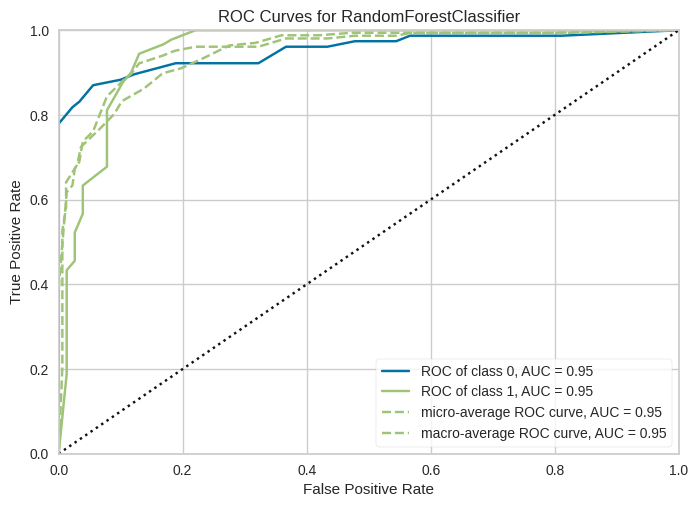

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [111]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF_upsampled)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

In [ ]:
'''
#SMOTE 
X_smote, Y_smote = SMOTE().fit_resample(X_upsampled, Y_upsampled) 

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)
(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)
(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)
model_upsampled_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_upsampled_SMOTE.fit(X_train_smote, y_train_smote)
prediction_test_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, prediction_test_smote))
print(roc_auc_score(y_test_smote, prediction_test_smote))
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()
'''

#ENSEMBLE METHODS

In [113]:
# AVERAGING METHOD
from sklearn.metrics import mean_squared_error

pred1 = LR_prediction_smote
pred2 = SVM_prediction_smote
pred3 = prediction_test_smote

pred_final = (pred1+pred2+pred3)/3.0
 
# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test_upsampled, pred_final))

0.4384564204923487


In [114]:
# MAX VOTING
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

model_1 = model_LR
model_2 = model_SVM
model_3 = model_SMOTE

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('logr', model_1), ('svm', model_2), ('rf', model_3)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_train_upsampled, y_train_upsampled)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test_upsampled)
 
# printing log loss between actual and predicted value
print(log_loss(y_test_upsampled, pred_final))

11.870664289829003


In [115]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19865 sha256=92885d86113a150c3da204f0bea1ca9afe8cba6781f450619e668066568cf6b0
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [118]:
# VOTING ENSEMBLE
from sklearn import model_selection
seed = 42
kfold = model_selection.KFold(n_splits=20)

estimators = [] # create different models

model_1 = LogisticRegression(); estimators.append(('logistic',model_1))
model_2 = SVC(); estimators.append(('svm',model_2))
model_3 = RandomForestClassifier(); estimators.append(('rf',model_3))

from sklearn.ensemble import VotingClassifier # create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train_smote, y_train_smote, cv=kfold)
print(results.mean())

0.6284313725490195


In [ ]:
'''
# TUNE ENSEMBLE
from sklearn.model_selection import cross_val_score, GridSearchCV

lr = LogisticRegression(solver='liblinear', random_state=1)
rf = RandomForestClassifier(max_features=9, n_jobs=4, random_state=1)
sv = SVC()

vc = VotingClassifier([('clf1',lr), ('clf2',rf), ('clf3',sv)]) # create an ensemble of 3 classifiers
cross_val_score(vc,X_train_smote, y_train_smote).mean()
param = {'voting':['hard', 'soft'], 'weights': [(1,1,1),(2,1,1),(1,2,1),(1,1,2)]} # define VotingClassifier parameters to search

grid = GridSearchCV(vc, param) #find the best set of parameters
grid.fit(X_train_smote, y_train_smote)
grid.best_score_
'''

 # k-folds validation

In [136]:
from sklearn.model_selection import cross_val_score
# 20 folds
#In general, the more folds we use in k-fold cross-validation the lower the bias of the test MSE 
#but the higher the variance. Conversely, the fewer folds we use the higher the bias but the lower the variance

scores = cross_val_score(model_SMOTE, X_train_smote, y_train_smote, scoring='r2', cv=20)
print(scores)

[-0.65277778  0.05882353 -0.41176471 -0.05882353  0.41176471 -0.45588235
 -0.33455882  0.15073529 -0.21323529 -0.09191176  0.02941176  0.15073529
  0.39338235  0.15073529 -0.09191176  0.63602941  0.75735294  0.39338235
  0.02941176  0.27205882]


In [137]:
print(np.mean(scores))

0.05614787581699343


In [138]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_SMOTE, X_train_smote, y_train_smote)
print(pred)

[0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 

In [139]:
scores_test = cross_val_score(model_SMOTE, X_train_smote, y_train_smote, cv=20)
print(scores_test)

[0.58823529 0.76470588 0.64705882 0.73529412 0.85294118 0.63636364
 0.66666667 0.78787879 0.6969697  0.72727273 0.75757576 0.78787879
 0.84848485 0.78787879 0.72727273 0.90909091 0.93939394 0.84848485
 0.75757576 0.81818182]


In [140]:
print(np.mean(scores_test))

0.7642602495543672
